# Projeto 3 Ciência dos Dados

##### Matheus Pellizzon, Pedro Ramos, Thiago Verardo

Ánálise de um Data Frame de vinhos tintos

Necessário:

*pip install pandas-profiling==1.4.0*

Nosso grupo visa executar um classificador de qualidade de vinhos tintos. Para isso, deve-se, primeiramente, selecionar um data frame com um grande número de linhas e colunas, para que uma análise melhor dos vinhos seja feita, em seguida, verificar a existência de argumentos inexistentes (NaN), caso existam, deve-se eliminar as linhas com eles. Com isso, o data frame estará limpo e pronto para ser trabalhado.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import statsmodels.api as sm
    import pandas_profiling
import matplotlib.pyplot as plt

**Importando o DataFrame:**

In [2]:
df = pd.read_csv('wineQualityReds.csv')
df.head(3)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df = df.drop(labels = 'Unnamed: 0', axis=1)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Analisando as variáveis do DataFrame:**

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,65


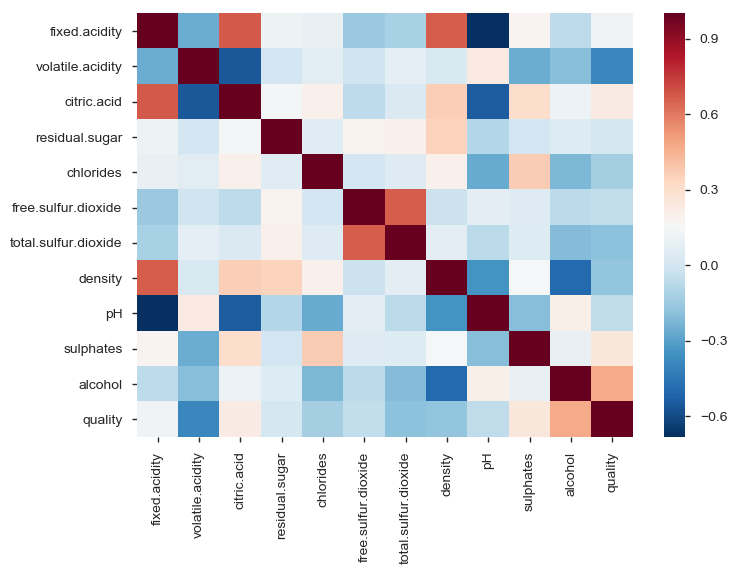

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'RdBu_r')

Ao analisar a correlação das colunas entre si, pode-se preceber que existem apenas três correlações acima de 0.6, que são: Acidez Fixa com a Densidade, Acidez Fixa com o Ácido Cítrico e o Dióxido Sulfúrico Total com o Dióxido Sulfúrico Livre.

E correlações abaixo de -0.6, que são: Acidez Fixa com o pH, Acidez Volátil com o Ácido Cítrico e Densidade com o Álcool.

Essas correlações eram esperadas, dado que são muito próximas umas das outras. As correlações podem interferir na regressão linear, pois ao se relacionarem, essa regressão deixa de ser 100% útil, já que existe outro tipo de relação, que não a linear.

Caso a Regressão não fique precisa, retirar uma das variáveis que se correlacionam pode vir a resolver o problema.

**Embaralhando o Data Frame para futura análise dos dados:**

In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(3)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.38,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
1,11.3,0.36,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6
2,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5


**Separando o DataFrame em 4/5 para o treinamento e em 1/5 para o teste da regressão:**

In [7]:
treinamento = pd.DataFrame(df[:1280])
teste = pd.DataFrame(df[1280:])

**Trabalhando o DataFrame de treinamento para definirmos o que vamos analisar:**

In [8]:
X = treinamento[['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

Y = treinamento['quality']

Nesse caso, vamos analisar todas as variáveis (eixo "x"), para ver o que influencia na qualidade (eixo "y").

In [9]:
Xc = sm.add_constant(X)
model = sm.OLS(Y,Xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     61.87
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          3.55e-110
Time:                        10:14:35   Log-Likelihood:                -1262.6
No. Observations:                1280   AIC:                             2549.
Df Residuals:                    1268   BIC:                             2611.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6692     23.838      0.322      0.748     -39.097      54.435
fixed.acidity            0.0073      0.029      0.249      0.803      -0.050       0.065
volatile.acidity        -1.0785      0.134     -8.070      0.000      -1.341      -0.816
citric.acid             -0.0451      0.165     -0.274      0.784      -0.368       0.278
residual.sugar           0.0090      0.017      0.543      0.587      -0.024       0.042
chlorides               -1.9161      0.449     -4.271      0.000      -2.796      -1.036
free.sulfur.dioxide      0.0041      0.002      1.706      0.088      -0.001       0.009
total.sulfur.dioxide    -0.0034      0.001     -4.208      0.000      -0.005      -0.002
density                 -3.2705     24.326     -0.134      0.893     -50.994      44.453
pH                      -0.4314      0.213     -2.025      0.043      -0.849      -0.014
sulphates                0.8527      0.127      6.714      0.000       0.603       1.102
alcohol                  0.2724      0.030      9.131      0.000       0.214       0.331
==============================================================================
Omnibus:                       16.014   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.844
Skew:                          -0.123   Prob(JB):                     1.09e-05
Kurtosis:                       3.607   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ao analisarmos todos o p-values, verificamos que dados como a constante, a acidez fixa, o ácido cítrico, o açúcar residual, a densidade e o pH alteravam a qualidade da regressão, por alterar, de forma considerável, o R².  

**Ajustando a regressão:**

In [10]:
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8709.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:14:35   Log-Likelihood:                -1262.7
No. Observations:                1280   AIC:                             2547.
Df Residuals:                    1269   BIC:                             2604.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed.acidity        -9.054e-05      0.018     -0.005      0.996      -0.036       0.036
volatile.acidity        -1.0831      0.133     -8.155      0.000      -1.344      -0.823
citric.acid             -0.0442      0.164     -0.269      0.788      -0.367       0.278
residual.sugar           0.0058      0.013      0.438      0.662      -0.020       0.032
chlorides               -1.9278      0.447     -4.313      0.000      -2.805      -1.051
free.sulfur.dioxide      0.0041      0.002      1.739      0.082      -0.001       0.009
total.sulfur.dioxide    -0.0035      0.001     -4.253      0.000      -0.005      -0.002
density                  4.5526      0.694      6.562      0.000       3.191       5.914
pH                      -0.4689      0.178     -2.631      0.009      -0.819      -0.119
sulphates                0.8421      0.123      6.867      0.000       0.601       1.083
alcohol                  0.2797      0.019     14.351      0.000       0.241       0.318
==============================================================================
Omnibus:                       15.591   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.156
Skew:                          -0.120   Prob(JB):                     1.54e-05
Kurtosis:                       3.598   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ao, apenas, retirarmos a constante da regressão, o R² melhorou de forma considerável (de 0.37 para 0.987). 

Mas, por acharmos estranho, tamanha diferença, decidimos retirar todas as variáveis que tiham um p-value maior que 5%, para refinar ainda mais a regressão e podermos identificar possíveis erros.

**Ajustes finais:**

In [11]:
X_alt = treinamento[['volatile.acidity', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

model = sm.OLS(Y,X_alt)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.369e+04
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:14:35   Log-Likelihood:                -1264.5
No. Observations:                1280   AIC:                             2543.
Df Residuals:                    1273   BIC:                             2579.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile.acidity        -1.0822      0.112     -9.705      0.000      -1.301      -0.863
chlorides               -1.9334      0.423     -4.572      0.000      -2.763      -1.104
total.sulfur.dioxide    -0.0025      0.001     -4.410      0.000      -0.004      -0.001
density                  4.3824      0.440      9.962      0.000       3.519       5.245
pH                      -0.4123      0.128     -3.229      0.001      -0.663      -0.162
sulphates                0.8432      0.122      6.918      0.000       0.604       1.082
alcohol                  0.2802      0.019     14.874      0.000       0.243       0.317
==============================================================================
Omnibus:                       15.293   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.271
Skew:                          -0.126   Prob(JB):                     2.40e-05
Kurtosis:                       3.579   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Retirando todas as variáveis com um p-value maior que 5%, pudemos observar que o R² permaneceu com o mesmo valor, de forma que contentou-nos para prosseguirmos às previsões.

**Iniciando o processo de previsão:**

In [12]:
results.params

volatile.acidity       -1.082159
chlorides              -1.933441
total.sulfur.dioxide   -0.002513
density                 4.382404
pH                     -0.412312
sulphates               0.843173
alcohol                 0.280164
dtype: float64

In [13]:
coefs = np.array(results.params)
coefs

array([-1.08215861e+00, -1.93344106e+00, -2.51301518e-03,  4.38240351e+00,
       -4.12311557e-01,  8.43172537e-01,  2.80163818e-01])

In [14]:
foo = teste[['volatile.acidity', 'chlorides', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
foo.head()

,volatile.acidity,chlorides,total.sulfur.dioxide,density,pH,sulphates,alcohol
1280,0.695,0.076,20.0,0.99546,3.29,0.54,10.1
1281,0.420,0.092,55.0,0.99471,3.78,0.64,12.3
1282,0.600,0.085,111.0,0.99640,3.15,0.66,9.8
1283,0.450,0.043,12.0,0.99354,3.30,0.65,11.4
1284,0.400,0.076,47.0,0.99554,3.36,0.48,9.4


In [15]:
teste['y_hat'] = foo.apply(lambda x: np.dot(coefs, x), axis=1)

In [16]:
teste['Previsão'] = teste['y_hat'].round(0)
teste.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,y_hat,Previsão
1280,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,5.341668,5.0
1281,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,6.015729,6.0
1282,8.4,0.600,0.10,2.2,0.085,14.0,111.0,0.99640,3.15,0.66,9.8,5,5.277362,5.0
1283,6.9,0.450,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6,6.135129,6.0
1284,6.5,0.400,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6,5.317837,5.0


Rodando a previsão, percebe-se que a regressão pode prever com uma precisão considerável. Para verificar a eficiência, devemos ver a porcentagem de erros e a de acertos. Para isso, de uma forma simples, vamos adicionar a duas listas diferentes, uma com a qualidade e a previsão iguais e outra com a qualidade diferente da previsão.

**Verificando a porcentagem de acertos:**

In [17]:
acertos = 0
erros = 0
for i in range(len(teste)):
    if list(teste['quality'])[i] == list(teste['Previsão'])[i]:
        acertos += 1
    else:
        erros += 1

print('Acurácia: {0:.2f}%'.format((acertos/len(teste))*100))

SPE = 0 # Somatória do percentual dos erros
for i in range(len(teste)):
    SPE += np.sqrt((list(teste['quality'])[i] - list(teste['y_hat'])[i]) ** 2) / list(teste['quality'])[i]

erro_medio = SPE / len(teste) * 100

print('Em média, o modelo tem uma margem de erro de {0:.2f}%'.format(erro_medio))

Acurácia: 57.68%
Em média, o modelo tem uma margem de erro de 8.91%


**Desenvolvendo uma regressão com regularização:**

In [18]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, intercept):
    
    lassoreg = Lasso(alpha = alpha, fit_intercept = intercept, normalize = True, max_iter = 1e5)
    lassoreg.fit(data[predictors], data['quality'])
    y_pred = lassoreg.predict(data[predictors])
    
    r_squared = lassoreg.score(data[predictors], data['quality'])
    ret = [r_squared]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [19]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 3e-3, 6e-3, 9e-3, 1e-2, 1e-1, 1, 5]
predictors = teste.columns.tolist()
predictors = predictors[:11]

In [25]:
col = ['R²','intercept'] + ['%s'%i for i in predictors]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,len(alpha_lasso))]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

for i in range(len(alpha_lasso)):
    coef_matrix_lasso.iloc[i,] = lasso_regression(teste, predictors, alpha_lasso[i], True)

In [26]:
coef_matrix_lasso

,R²,intercept,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
alpha_1e-15,0.423904,66.6562,0.0909619,-1.00306,-0.643133,0.0358125,-1.77552,0.00617942,-0.00263853,-63.8992,-0.349594,1.20209,0.30054
alpha_1e-10,0.423904,66.6562,0.0909619,-1.00306,-0.643133,0.0358125,-1.77552,0.00617942,-0.00263853,-63.8992,-0.349594,1.20209,0.30054
alpha_1e-08,0.423904,66.6557,0.0909612,-1.00306,-0.643128,0.0358121,-1.77551,0.00617938,-0.00263852,-63.8987,-0.349594,1.20209,0.30054
alpha_1e-05,0.423903,66.1493,0.0902005,-1.0015,-0.63824,0.0353976,-1.77139,0.00613876,-0.00262536,-63.3866,-0.349832,1.19989,0.300851
alpha_0.0001,0.423771,61.531,0.0832806,-0.987541,-0.594267,0.0316373,-1.73459,0.00577408,-0.00250717,-58.7155,-0.35248,1.18008,0.303709
alpha_0.001,0.41129,19.3321,0.01669,-0.847251,-0.153463,0,-1.38621,0.00203476,-0.00136406,-16.0538,-0.359851,0.989743,0.327597
alpha_0.003,0.383051,2.35862,0,-0.791603,-0,-0,-0.0525336,0,-4.24327e-05,-0,-0,0.709272,0.31735
alpha_0.006,0.355529,2.79304,0,-0.596379,0,-0,-0,0,-0,-0,-0,0.442959,0.281982
alpha_0.009,0.310354,3.23743,0,-0.399658,0,-0,-0,0,-0,-0,-0,0.17965,0.245997
alpha_0.01,0.29128,3.38556,0,-0.334086,0,-0,-0,0,-0,-0,-0,0.0918823,0.234002


In [29]:
col = ['R²','intercept'] + ['%s'%i for i in predictors]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,len(alpha_lasso))]
coef_matrix_lasso2 = pd.DataFrame(index=ind, columns=col)

for i in range(len(alpha_lasso)):
    coef_matrix_lasso2.iloc[i,] = lasso_regression(teste, predictors, alpha_lasso[i], False)

In [30]:
coef_matrix_lasso2

,R²,intercept,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
alpha_1e-15,0.420233,0,0.0336219,-1.08829,-0.708881,0.00764432,-2.01043,0.00687618,-0.00268357,4.18657,-0.713345,1.13974,0.363988
alpha_1e-10,0.420233,0,0.0336219,-1.08829,-0.708881,0.00764431,-2.01043,0.00687618,-0.00268357,4.18657,-0.713345,1.13974,0.363988
alpha_1e-08,0.420233,0,0.0336222,-1.08829,-0.70888,0.00764424,-2.01042,0.00687618,-0.00268356,4.18655,-0.713339,1.13973,0.363988
alpha_1e-05,0.420233,0,0.0339692,-1.08782,-0.708222,0.00756452,-1.99358,0.0068733,-0.00267701,4.16217,-0.707634,1.13837,0.364133
alpha_0.0001,0.420159,0,0.0370942,-1.0836,-0.702291,0.00684639,-1.84195,0.00684739,-0.00261797,3.94262,-0.656248,1.12611,0.365444
alpha_0.001,0.412819,0,0.0682624,-1.04178,-0.64316,0,-0.328433,0.00658396,-0.00203114,1.74984,-0.142864,1.00373,0.378471
alpha_0.003,0.399805,0,0.0864051,-0.780729,-0.410244,-0.00320068,-0,0.00754571,-0.00181685,0.106105,0.18715,0.918821,0.398317
alpha_0.006,0.387056,0,0.0686869,-0.459782,-0.0124194,-0.00717837,-0,0.0093078,-0.00229231,0,0.186857,0.776426,0.405834
alpha_0.009,0.380423,0,0.0727674,-0.313152,-0,-0.00828396,-0,0.0100332,-0.00237412,0,0.127861,0.673107,0.419669
alpha_0.01,0.377769,0,0.0743775,-0.266163,-0,-0.00861984,-0,0.0102633,-0.00239683,0,0.107871,0.639107,0.424346


**Conclusão:**

0 p3dr0 3 l1nd0